<a href="https://colab.research.google.com/github/GillalaJeevana/Jeevana_INFO5502_Spring2022/blob/main/Jeevana_lab_assignment_04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
!unzip /content/sample_data/preprocessed_cases[cases_29404].zip

In [ ]:
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

In [ ]:
mainDir = os.listdir("/content/preprocessed_cases[cases_29404]")

In [ ]:
mainDir

# Question 1

In [ ]:
i = 0
for dir in mainDir:
  if dir == ".DS_Store":
    continue
  i += 1

print("Total categories in total", i)

Total categories in total 76


# Question 2

In [ ]:
for dir in mainDir:
  files = os.listdir("/content/preprocessed_cases[cases_29404]/" + dir)
  print("In Folder " + dir + " we have Totally " + str(len(files)) + " Files")

In Folder 32 we have Totally 118 Files
In Folder 7 we have Totally 621 Files
In Folder 51 we have Totally 225 Files
In Folder 62 we have Totally 218 Files
In Folder 67 we have Totally 356 Files
In Folder 11 we have Totally 605 Files
In Folder 25 we have Totally 244 Files
In Folder 38 we have Totally 503 Files
In Folder 60 we have Totally 42 Files
In Folder 17 we have Totally 125 Files
In Folder 4 we have Totally 231 Files
In Folder 13 we have Totally 458 Files
In Folder 47 we have Totally 151 Files
In Folder 75 we have Totally 473 Files
In Folder 68 we have Totally 263 Files
In Folder 5 we have Totally 751 Files
In Folder 58 we have Totally 150 Files
In Folder 37 we have Totally 74 Files
In Folder 33 we have Totally 272 Files
In Folder 36 we have Totally 889 Files
In Folder 29 we have Totally 213 Files
In Folder 52 we have Totally 318 Files
In Folder 24 we have Totally 628 Files
In Folder 27 we have Totally 77 Files
In Folder 76 we have Totally 177 Files
In Folder 50 we have Totally 68

# Question 3

In [ ]:
total_Setences = []
corpus_root = '/content/preprocessed_cases[cases_29404]'
corpus = PlaintextCorpusReader(corpus_root, '.*txt')
id_list = corpus.fileids()
len_total=len(id_list)
print(len_total)
allwords=[]
for i in id_list:
 r=open("/content/preprocessed_cases[cases_29404]/{}".format(i),"rt")
 data = r.read()
 tokens = nltk.sent_tokenize(data)
 total_Setences.append(len(tokens))

29404


In [ ]:
avergaeNumberOfSentence = sum(total_Setences) / len(total_Setences)
print("Average Number of Sentences: ", avergaeNumberOfSentence)

Average Number of Sentences:  34.54319140253027


# Question 4

In [ ]:
wordCount = []
for i in id_list:
 r=open("/content/preprocessed_cases[cases_29404]/{}".format(i),"rt")
 data = r.read()
 words = data.split()
 wordCount.append(len(words))

In [ ]:
print('Average number of words is {}'.format(sum(wordCount)/len(id_list)))

Average number of words is 3634.6446061760303


# Question 5

In [ ]:
!pip install stop_words

In [ ]:
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))

stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
print(len(stopwords))

In [ ]:
def convertLower(text):
  return text.str.lower()

def removePunctuation(text):
  return text.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

def removeStopWords(text):
  return text.apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))


In [ ]:
list_of_words = []
path = os.listdir("/content/preprocessed_cases[cases_29404]")

for folder in path:
    docs = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = convertLower(data[col])
                data[col] = removePunctuation(data[col])
                data[col] = removeStopWords(data[col])
                for sent in data[col]:
                    list_of_words.extend(sent.split())
    except Exception as e:
        print(e)

No columns to parse from file


In [ ]:
from collections import Counter

counter_list = (Counter(list_of_words).most_common(50))

In [ ]:
counter_list

[('court', 916102),
 ('district', 369278),
 ('state', 239755),
 ('also', 219423),
 ('evidence', 191507),
 ('whether', 188675),
 ('may', 181439),
 ('law', 170088),
 ('states', 159082),
 ('must', 157488),
 ('claim', 155550),
 ('case', 155090),
 ('federal', 153722),
 ('trial', 143626),
 ('united', 142180),
 ('claims', 139867),
 ('one', 135028),
 ('judgment', 131722),
 ('action', 128021),
 ('order', 125660),
 ('first', 120900),
 ('government', 119460),
 ('section', 114909),
 ('defendant', 112806),
 ('act', 112041),
 ('review', 109941),
 ('issue', 108065),
 ('two', 107779),
 ('motion', 106467),
 ('rule', 105693),
 ('decision', 104967),
 ('new', 104195),
 ('time', 101820),
 ('plaintiff', 100272),
 ('plaintiffs', 97704),
 ('filed', 93794),
 ('public', 93556),
 ('made', 92294),
 ('statute', 91646),
 ('jury', 90679),
 ('right', 89590),
 ('defendants', 86711),
 ('found', 86242),
 ('parties', 85984),
 ('held', 85549),
 ('supreme', 84870),
 ('use', 82990),
 ('within', 79342),
 ('based', 79115),
 (

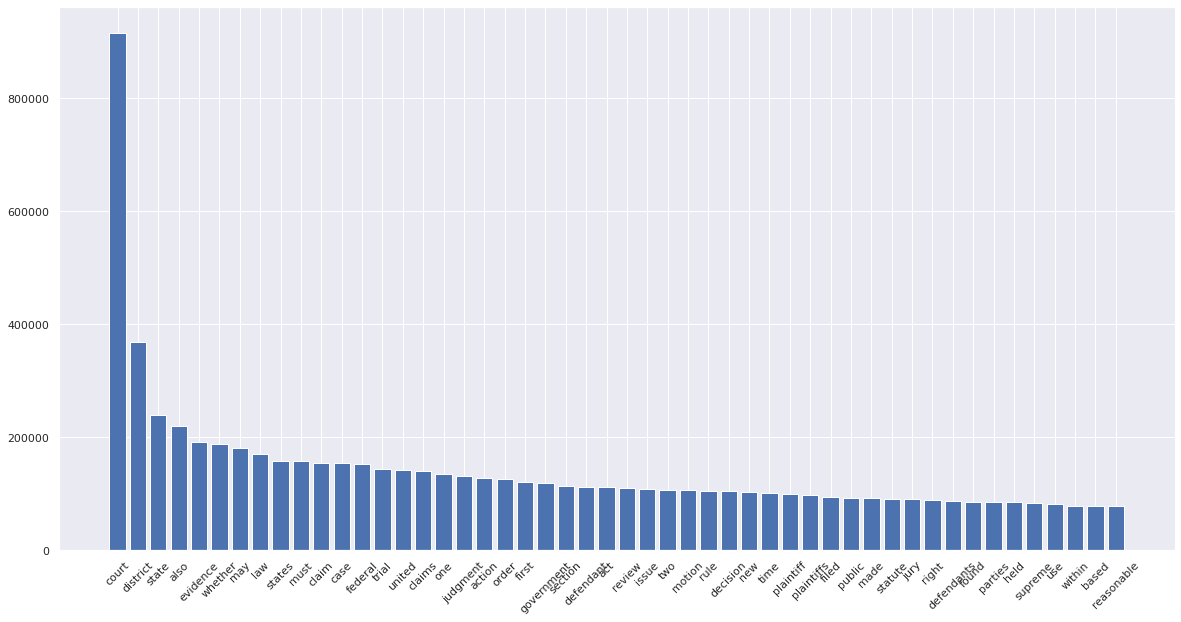

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc = {'figure.figsize':(20,10)})
plt.bar(dict(counter_list).keys(), dict(counter_list).values())
plt.xticks(rotation =45)
plt.show()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv('/content/sample_data/lab-assignment-04-student-performance.csv', 
                        sep=',',
                        header=0)

In [ ]:
dataframe

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,M,G,Pass,Good,Good,Pass,Y,Unmarried,T,Free,...,Um,Il,Service,Housewife,Small,Average,Govt,Asm,Small,Poor
127,M,MOBC,Vg,Vg,Good,Good,N,Unmarried,V,Free,...,10,Um,Farmer,Housewife,Average,Poor,Govt,Asm,Small,Average
128,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Free,...,Il,Il,Farmer,Housewife,Small,Average,Govt,Asm,Large,Good
129,M,ST,Pass,Pass,Good,Pass,Y,Unmarried,V,Free,...,Um,Um,Service,Housewife,Average,Average,Govt,Asm,Large,Average


# Question 1

In [ ]:
dataframe.shape

(131, 22)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ge      131 non-null    object
 1   cst     131 non-null    object
 2   tnp     131 non-null    object
 3   twp     131 non-null    object
 4   iap     131 non-null    object
 5   esp     131 non-null    object
 6   arr     131 non-null    object
 7   ms      131 non-null    object
 8   ls      131 non-null    object
 9   as      131 non-null    object
 10  fmi     131 non-null    object
 11  fs      131 non-null    object
 12  fq      131 non-null    object
 13  mq      131 non-null    object
 14  fo      131 non-null    object
 15  mo      131 non-null    object
 16  nf      131 non-null    object
 17  sh      131 non-null    object
 18  ss      131 non-null    object
 19  me      131 non-null    object
 20  tt      131 non-null    object
 21  atd     131 non-null    object
dtypes: object(22)
memory usage

In [ ]:
dataframe.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


# Question 2

In [ ]:
dataframe = dataframe.rename(columns={'sh': 'Study Hours'})

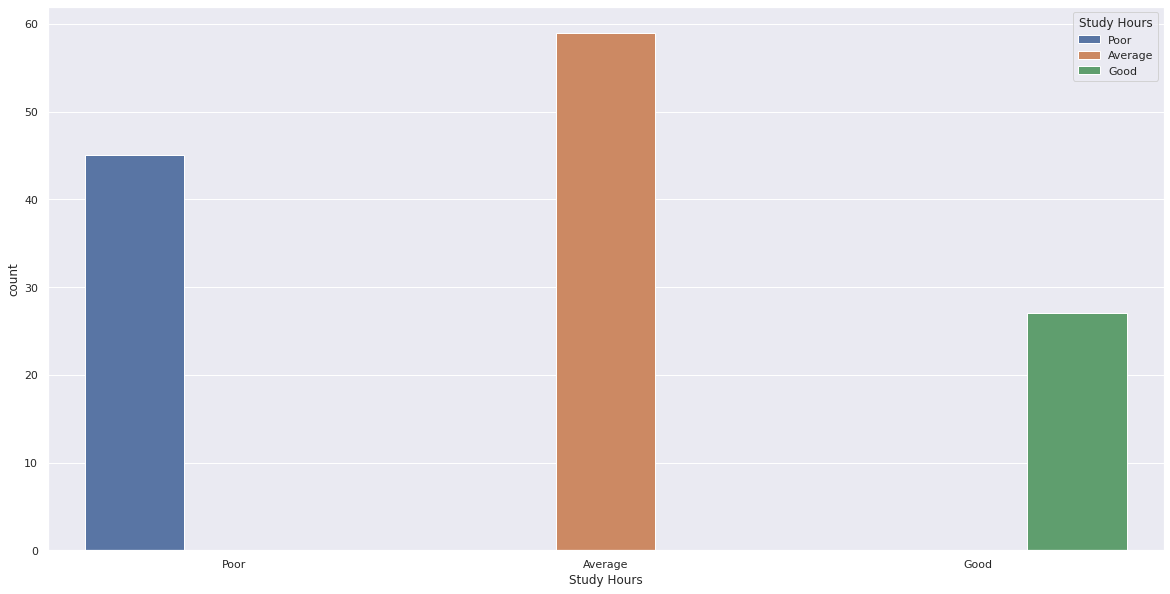

In [ ]:
sns.countplot(x='Study Hours', data=dataframe, hue='Study Hours')

# Question 3

In [ ]:
dataframe = dataframe.rename(columns={'esp' : 'End Semester Percentage'})

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


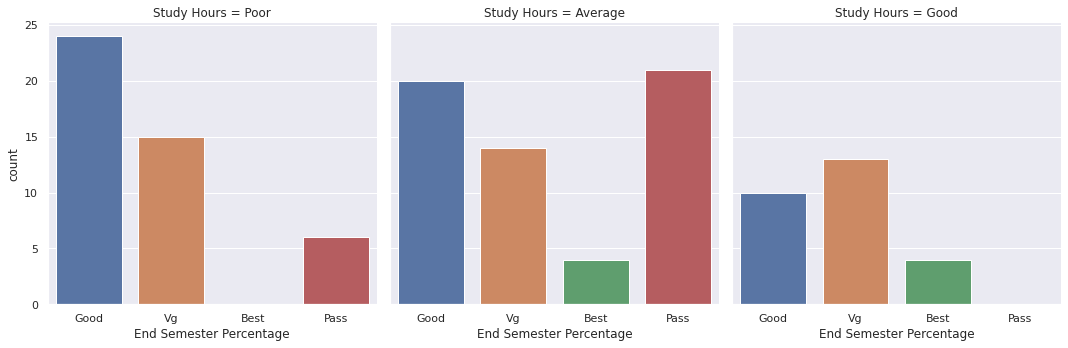

In [ ]:
sns.factorplot(x='End Semester Percentage', col='Study Hours', kind='count', data=dataframe)

# Question 4

In [ ]:
dataframe

,ge,cst,tnp,twp,iap,End Semester Percentage,arr,ms,ls,as,...,fq,mq,fo,mo,nf,Study Hours,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,M,G,Pass,Good,Good,Pass,Y,Unmarried,T,Free,...,Um,Il,Service,Housewife,Small,Average,Govt,Asm,Small,Poor
127,M,MOBC,Vg,Vg,Good,Good,N,Unmarried,V,Free,...,10,Um,Farmer,Housewife,Average,Poor,Govt,Asm,Small,Average
128,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Free,...,Il,Il,Farmer,Housewife,Small,Average,Govt,Asm,Large,Good
129,M,ST,Pass,Pass,Good,Pass,Y,Unmarried,V,Free,...,Um,Um,Service,Housewife,Average,Average,Govt,Asm,Large,Average


In [ ]:
dataframe.drop('ms', axis=1, inplace=True)

In [ ]:
dataframe

,ge,cst,tnp,twp,iap,End Semester Percentage,arr,ls,as,fmi,...,fq,mq,fo,mo,nf,Study Hours,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,V,Paid,Medium,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,V,Paid,Low,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,V,Paid,Am,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,V,Paid,Medium,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,V,Paid,Am,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,M,G,Pass,Good,Good,Pass,Y,T,Free,Low,...,Um,Il,Service,Housewife,Small,Average,Govt,Asm,Small,Poor
127,M,MOBC,Vg,Vg,Good,Good,N,V,Free,High,...,10,Um,Farmer,Housewife,Average,Poor,Govt,Asm,Small,Average
128,F,OBC,Good,Good,Vg,Good,N,V,Free,Am,...,Il,Il,Farmer,Housewife,Small,Average,Govt,Asm,Large,Good
129,M,ST,Pass,Pass,Good,Pass,Y,V,Free,Low,...,Um,Um,Service,Housewife,Average,Average,Govt,Asm,Large,Average


# Question 5

In [ ]:
from sklearn import preprocessing
import seaborn as sns

label_encoder = preprocessing.LabelEncoder()

def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

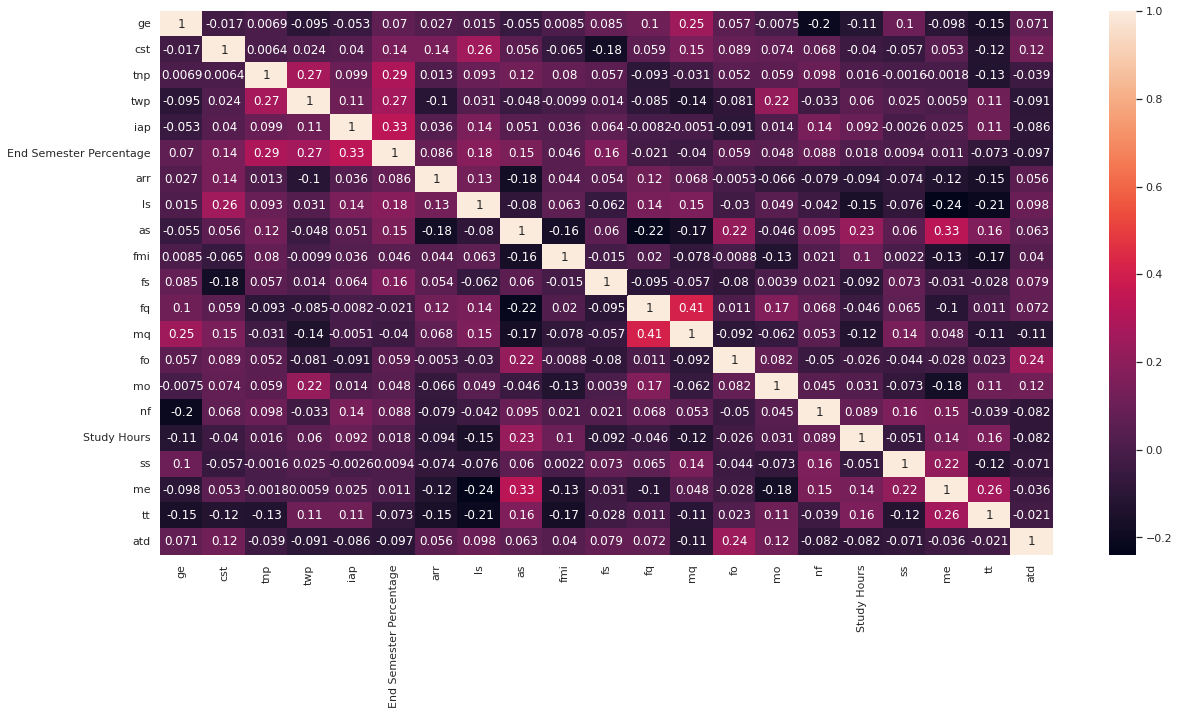

In [ ]:
df1 = Encoder(dataframe)
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
# Your three questions:

'''
For the EDA analysis I took Car features and their corresponding MSRP.

Dataset from Kaggle: https://www.kaggle.com/iazhar/exploratorydataanalysis-priceprediction/notebook

1. Clean the Data Set
2. Outlier Detection
3. Outlier Removal
4. Find the correlation
'''

'\nPlease list your questions here:\n\n\n\n\n\n'

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.shape

(11914, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df1 = df.drop('Market Category', axis='columns')
print(df1.shape)
df1.head()

(11914, 15)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
df1.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [ ]:
df1[df1.isnull()['Engine HP']]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950


In [ ]:
df2 = df1.dropna()
df2.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Vehicle Size       11812 non-null  object 
 10  Vehicle Style      11812 non-null  object 
 11  highway MPG        11812 non-null  int64  
 12  city mpg           11812 non-null  int64  
 13  Popularity         11812 non-null  int64  
 14  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
df3 = df2.drop(['Engine Fuel Type','Number of Doors','Vehicle Size','Vehicle Style','Popularity'], axis='columns')
df3.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df3 = df3.rename(columns={'Make':'make',
                          'Model':'model',
                          'Year':'year',
                          'Engine HP':'hp',
                          'Engine Cylinders':'cylinders',
                          'Transmission Type':'transmission',
                          'Driven_Wheels':'drive_mode',
                          'highway MPG':'mpg_h',
                          'city mpg':'mpg_c',
                          'MSRP':'price'})
df3.head()

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
dupe_rows = df3[df3.duplicated()]
dupe_rows.shape

(989, 10)

In [ ]:
df3.shape

(11812, 10)

In [ ]:
df3 = df3.drop_duplicates()
df3.shape

(10823, 10)

In [ ]:
df3['drive_mode'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [ ]:
df3.dtypes


make             object
model            object
year              int64
hp              float64
cylinders       float64
transmission     object
drive_mode       object
mpg_h             int64
mpg_c             int64
price             int64
dtype: object

In [ ]:
cat_col = list(df3.dtypes[df3.dtypes == 'object'].index)
num_col = list(df3.dtypes[df3.dtypes != 'object'].index)
print(cat_col)
print(num_col)

['make', 'model', 'transmission', 'drive_mode']
['year', 'hp', 'cylinders', 'mpg_h', 'mpg_c', 'price']


In [ ]:
for col in cat_col:
    uniqs = df3[col].unique()
    print(col,':',len(uniqs),'Nos.')
    print(uniqs,'\n')

make : 47 Nos.
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Bugatti'] 

model : 904 Nos.
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500' '500L' '500X' '550' '560-Class' '570S' '575M' '57'
 '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglie

In [ ]:
df3[df3['transmission']=='UNKNOWN']

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,price
1289,Oldsmobile,Achieva,1997,150.0,4.0,UNKNOWN,front wheel drive,29,19,2000
4691,Pontiac,Firebird,2000,305.0,8.0,UNKNOWN,rear wheel drive,23,15,6175
4692,Pontiac,Firebird,2000,305.0,8.0,UNKNOWN,rear wheel drive,23,15,8548
4693,Pontiac,Firebird,2000,305.0,8.0,UNKNOWN,rear wheel drive,23,15,9567
6158,GMC,Jimmy,1999,190.0,6.0,UNKNOWN,rear wheel drive,19,14,2182
6160,GMC,Jimmy,1999,190.0,6.0,UNKNOWN,four wheel drive,19,14,2317
6165,GMC,Jimmy,2000,190.0,6.0,UNKNOWN,rear wheel drive,20,15,2407
6174,GMC,Jimmy,2000,190.0,6.0,UNKNOWN,four wheel drive,18,14,2578
6366,Chrysler,Le Baron,1993,100.0,4.0,UNKNOWN,front wheel drive,26,21,2000
6368,Chrysler,Le Baron,1993,100.0,4.0,UNKNOWN,front wheel drive,24,18,2000


In [ ]:
df3.shape


(10823, 10)

In [ ]:
df3 = df3.drop(df3[df3['transmission']=='UNKNOWN'].index, axis='index')
df3

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [ ]:
df3['transmission'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE'],
      dtype=object)

In [ ]:
df3[num_col] = df3[num_col].astype(float)
df3.dtypes

make             object
model            object
year            float64
hp              float64
cylinders       float64
transmission     object
drive_mode       object
mpg_h           float64
mpg_c           float64
price           float64
dtype: object

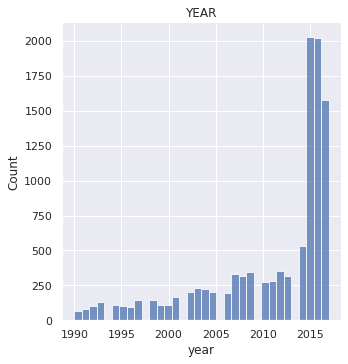

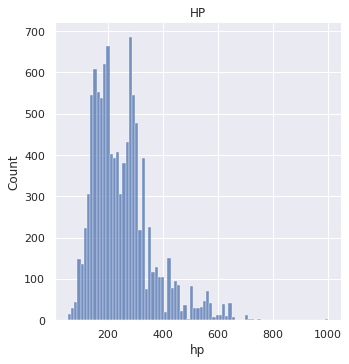

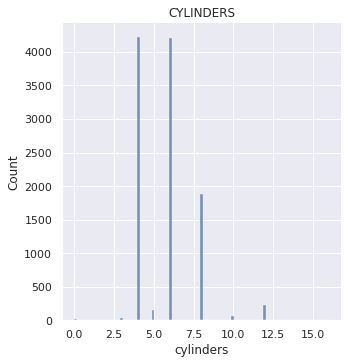

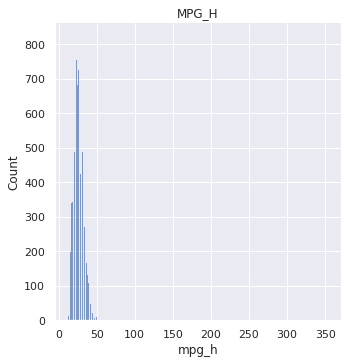

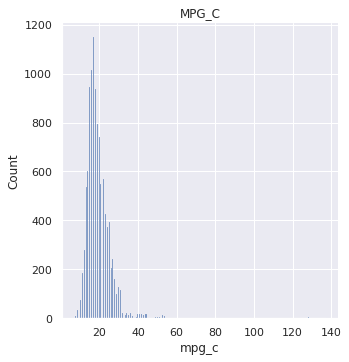

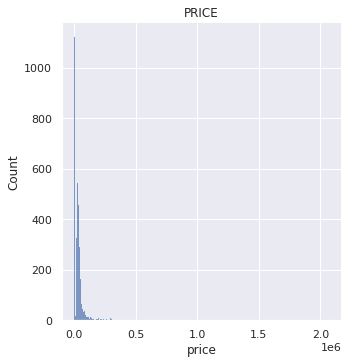

In [ ]:
for col in num_col:
    sns.displot(df3[col])
    plt.title(str.upper(col))
    plt.show()
    print('\n')

In [ ]:
df3.describe()

,year,hp,cylinders,mpg_h,mpg_c,price
count,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,1.081200e+04
mean,2010.911765,254.604144,5.690622,26.313910,19.332778,4.251589e+04
std,7.019561,109.797003,1.768074,7.507026,6.646057,6.227682e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.750000,4.000000,22.000000,16.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.089250e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


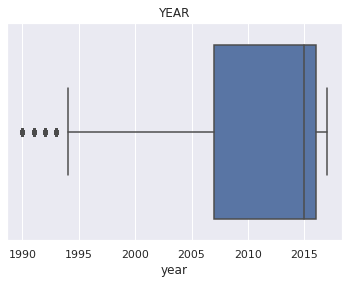

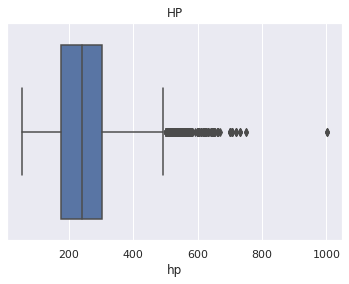

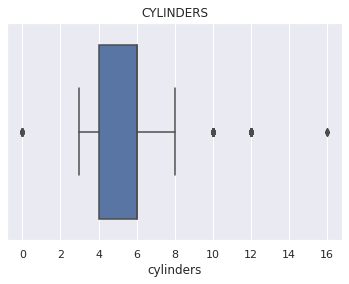

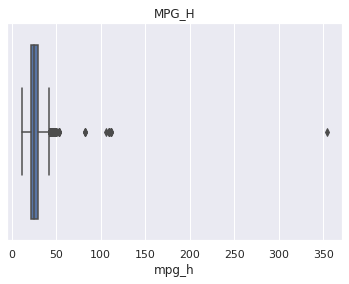

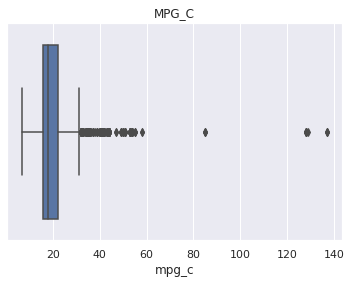

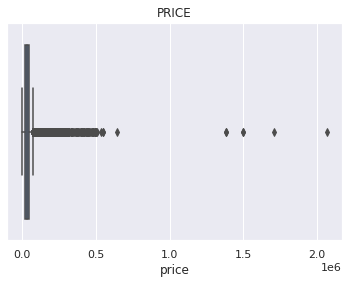

In [ ]:
for col in num_col:
    sns.boxplot(x=df3[col])
    plt.title(str.upper(col))
    plt.show()
    print('\n')

In [ ]:
def remove_outlier(dfx,column):
    Q1 = dfx[column].quantile(0.25)
    Q3 = dfx[column].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1-1.5*IQR
    upr_limit = Q3+1.5*IQR
    df_out = dfx[(dfx[column] > low_limit) & (dfx[column] < upr_limit)]
    return df_out

In [ ]:
df4 = df3.copy()
df4.columns

Index(['make', 'model', 'year', 'hp', 'cylinders', 'transmission',
       'drive_mode', 'mpg_h', 'mpg_c', 'price'],
      dtype='object')

In [ ]:
to_clean = ['hp', 'cylinders', 'mpg_h', 'mpg_c', 'price']
for col in to_clean:
    df4 = remove_outlier(df4,col)
df4.shape

(9383, 10)

In [ ]:
df4.describe()

,year,hp,cylinders,mpg_h,mpg_c,price
count,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000
mean,2010.478845,233.663647,5.438453,26.173932,19.065011,29669.564745
std,7.269455,76.516915,1.386823,5.551278,4.202155,15425.328979
min,1990.000000,63.000000,3.000000,12.000000,10.000000,2000.000000
25%,2007.000000,171.500000,4.000000,22.000000,16.000000,21095.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,29440.000000
75%,2016.000000,288.000000,6.000000,30.000000,22.000000,39150.000000
max,2017.000000,485.000000,8.000000,41.000000,30.000000,70950.000000


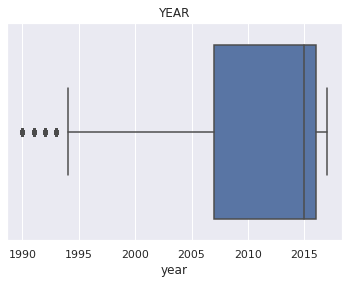

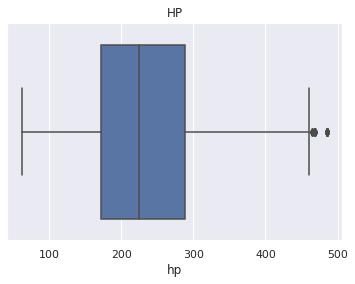

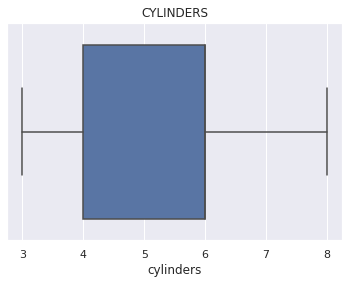

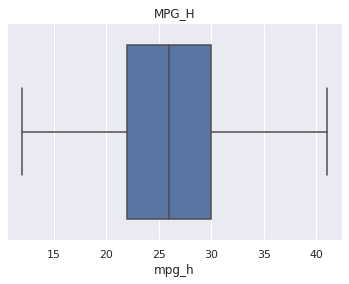

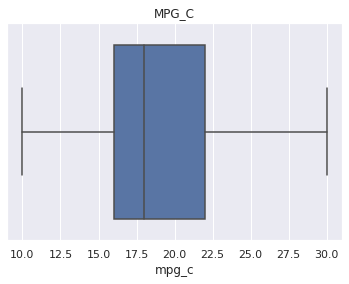

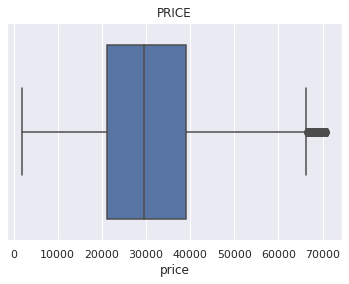

In [ ]:
for col in num_col:
    sns.boxplot(x=df4[col])
    plt.title(str.upper(col))
    plt.show()
    print('\n')

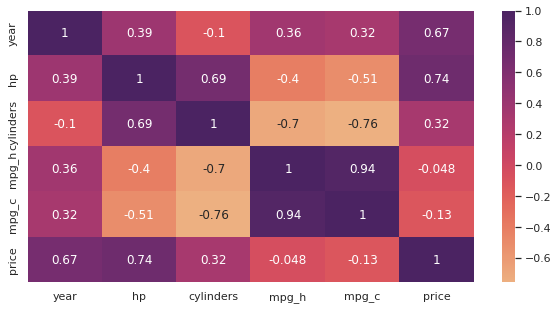

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr(), cmap='flare', annot=True)